# Ungraded lab 1: Preprocessing

*Copyrighted material*

**Objectives:** Processes raw tweets

**Steps:**
* Use NLTK to get a sample dataset of tweets
* Use NLTK functions to preprocess raw tweets.


## Import the required libraries

During assigments of weeks 1 and 2 you will make sentiment analysis on tweets. [*NLTK*](http://www.nltk.org/howto/twitter.html) is a opensource Python library to collect and process Twitter data.

NLTK allows to work with 'live' Tweeter data. If you are interested, just review the documentation of the project. But for this project, you are going to use the example dataset that comes alonside with NLTK, which has been manually annotated, and is intented to serve to quickly stablish baselines for your models. 

So, to start let's import the required libraries for this project

In [1]:
import nltk                         # Tweeter toolbox
from os import getcwd
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import pandas                       # Library for dataframes

filePath = f"{getcwd()}/../tmp2/"   # Use this file path to read or store your data
nltk.data.path.append(filePath)     # Set this path as the root of nltk

## About the tweeter dataset

NLTK comes with a sample dataset that has been manually separated between positive and negative tweets. This dataset contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between those numbers is not a concidence. The dataset is intented to be balanced. That does not reflect the real distributions of positive and negative clases in tweeter streams. It is just because balanced datasets simplify the design of most of the computational methods that you will implement for sentiment analysis. But it is better if you are aware that this balance of classes is artificial. 

But it is better if you see this by your self. Within the **coursera** platform, the sample dataset has been previously downloaded for you. However, if you are running this notebook on your local computer you will need to download the data by doing:

### Imported functions
    * tweeter samples
```Python
nltk.download('twitter_samples')
```

    * stopwords:
```python
nltk.download('stopwords')
```

Now, you can load the data using one of the functions provided by NLTK

In [2]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Now, you can print a report with the number of positive and negative tweets. It is important to know that what kind of data structure is used to store the datasets

In [3]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of positive tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_negative_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of positive tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


Tweets are stored as str, which is a short for string. We will refer to tweets within the coding excercises as strings.

but you can make a more visualy apealing report using pyplot. Let's see how to create a [pie plot](https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) to show the same information as before:

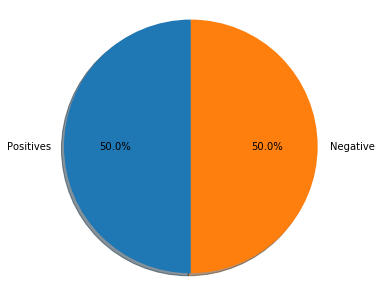

In [4]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positives', 'Negative'
# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

This simple snipe of code will serve you in future visualizations for this kind of data

### Print some examples in the console

Now, something you want to do, before doing anything else, is to display couple of samples 
from your dataset, just to see how they looks like. To undestand your data is reponsible of 80% of the success or fails in datascience projects. Don't miss opportunities to deep in your data.

In this case, you will print one positive and one random negative tweet in the console. To give more visual effect, we have added a color mark at the beining of the string. Just see the result!

In [5]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[543])

@OrchardTeaRoom @madsenjewellery thanks &amp; you are very welcome, hope it all goes brilliantly.  :)


In [6]:
# print negative in red
print('\033[91m' + all_negative_tweets[543])

@enikotsz @pooj_ @UberUK @walls With this rain though? :(


## Preprocess raw text for Sentiment analysis

Data preprocessing is one the key steps in any machine learning project. Data preprocessing comprises the steps of integrating, cleaning, and formating the data before to feed a machine learning algorithm. For NLP, the preprocessing steps comprise the following tasks:
* Tokenize the string
* Lower case the string
* Remove stop words and URLs
* Steaming

The definition of each step is explained in the videos. So just see the effect of each of these steps in a given set of tweets. 

In [7]:
# Our selected sample. Complex enougth to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


First, let's import the functions from NLTK for this purpose

In [8]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

### Remove hyperlinks,  tweeter marks and styles

In this step we remove some subtrings that are commonly used in tweeter like the hashtag, retweet marks and hyperlinks

In [9]:
print('\033[92m' + tweet)
print('\033[94m')

# remove stock market tickers like $GE
tweet2 = re.sub(r'\$\w*', '', tweet)
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet2)
# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenize the string

Tokenize means split the strings into individual words without blanks or tabs. In this same step we convert to lower case each word in the string. 

In [10]:
# tokenize tweets
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)

print(tweet_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Remove stop words and punctuations

The next step is to remove stop words and simple puntuation like (!,:.+-). 

**Note** that the punctuations like ':)', '...'  are retained when dealing with tweets, because in tweeter they are used to express emotions. In some other contexts, like in the NLP for medical analysis the punctuation is usually removed.

In [11]:
stopwords_english = stopwords.words('english') #Import the stop words list from NLTK

print('Stop words\n')
print(stopwords_english)
print('\nPuntuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

Get familiar with the list of stop words. It could contain some words that could be important in some context. 
Note here the presence of words like: _i, not, between, because, won, against_. 
Perhaps you will need to customize your stop words list for some applications. 

In [12]:
tweets_clean = []
for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print(tweets_clean)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Please note that the words **happy** and **sunny** in this list are correctly spelled. 

### Steamming

Steamming is the process of converting a word to it most general form or steam. 
Consider the words: 
 * **leanr**
 * **leanr**ning
 * **learn**ed
 * **learn**t
 
 All these words are steammed to its common root **learn**. However, in somecase the steamming process produce words that looks like mistakes. This is the case of happi and sunni. Why? Well, because the set of words that comprises the different forms of happy are:
 * **happ**y
 * **happi**ness
 * **happi**er
 
 which most common steam is **happi**. Perhaps **happ** cannot be used because it was already used to steam **happen** 
 
 So, don't worry about the spelling from here in advance. It is just the way steaming works.

In [13]:
stemmer = PorterStemmer() # Instantiate one of the steammers available in NLTK

tweets_steam = [] # Create an empty list to store the steammed words

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_steam.append(stem_word)  # append to the list
    
print(tweets_steam)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


## process_tweet

Although all this process could seem a little long and complex, you won't need to worry about it anymore. During the week's assignment you will use the function _process_tweet(tweet)_. This function has been already programed by us and it is available in the utils script included in the following notebooks. 

So, to obtain the same result as in the previous code cells, you only need to call _process_tweet_

In [14]:
from utils import process_tweet # Import the process_tweet function

tweets_steam = process_tweet(all_positive_tweets[2277]); # Preprocess a given tweet

print(tweets_steam) # Print the result

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
